# Одномерный МКЭ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
def solution(x, N=3):
    return np.sqrt(2 * N) / (2 * np.cos(np.sqrt(2 * N))) * np.sin(np.sqrt(2 * N) * x)

In [3]:
def phi_i(x, x1, i, h):
    if i == 0:
        return np.where((x1[i] <= x) & (x <= x1[i+1]), (x1[i+1] - x) / h, 0.0)
    elif i == len(x1)-1:
        return np.where((x1[i-1] <= x) & (x <= x1[i]), (x - x1[i-1]) / h, 0.0)
    else:
        return np.where((x1[i-1] <= x) & (x <= x1[i]), (x - x1[i-1]) / h,
                        np.where((x1[i] <= x) & (x <= x1[i+1]), (x1[i+1] - x) / h, 0.0))

In [4]:
def dphi_i(x, x1, i, h):
    if i == 0:
        return np.where((x1[i] <= x) & (x <= x1[i+1]), -1 / h, 0.0)
    elif i == len(x1)-1:
        return np.where((x1[i-1] <= x) & (x <= x1[i]), 1 / h, 0.0)
    else:
        return np.where((x1[i-1] <= x) & (x <= x1[i]), 1 / h,
                        np.where((x1[i] <= x) & (x <= x1[i+1]), -1 / h, 0.0))

In [5]:
def solve(n=40, N=3):
    h = 1.0 / n
    x1 = np.linspace(0, 1, n + 1)  
    A = np.zeros((n + 1, n + 1))
    F = np.zeros(n + 1)


    for i in range(n + 1):
        for n_ in range(n + 1):
            if i > 0:
                b1 = max(x1[i-1], x1[n_ - 1] if n_ > 0 else 0)
            else:
                b1 = x1[n_-1] if n_ > 0 else 0
            if i < n:
                b2 = min(x1[i+1], x1[n_ + 1] if n_ < n else 1)
            else:
                b2 = x1[n_ + 1] if n_ < n else 1

            integrand = lambda x: dphi_i(x, x1, i, h) * dphi_i(x, x1, n_, h) - 2 * N * phi_i(x, x1, i, h) * phi_i(x, x1, n_, h)

            A[i, n_] = quad(integrand, b1, b2, limit=100)[0]
        if i == n:
            F[i] += N
    A[0, :] = 0.0
    A[0, 0] = 1.0
    F[0] = 0.0

    C = np.linalg.solve(A, F)

    x2 = np.linspace(0, 1, n)
    uN = np.zeros_like(x2)
    for i in range(0, n + 1):
        uN = uN + C[i] * phi_i(x2, x1, i, h)

    return x1, x2, uN

In [6]:
def plot(n=40):
    x1, x2, uN = solve(n=n)
    
    plt.plot(x2, uN, '.', markersize=6, label='Численное решение')
    plt.plot(x1, solution(x1), 'r-', label='Точное решение')
    plt.legend()
    plt.show()

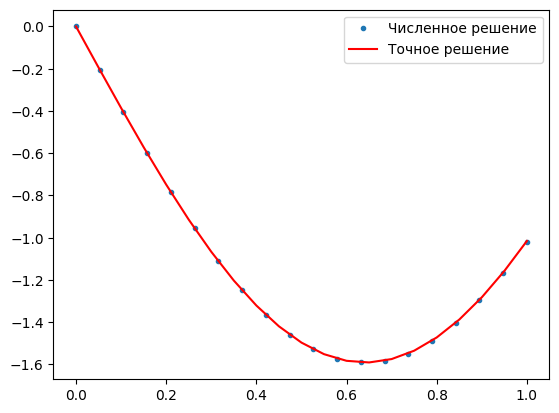

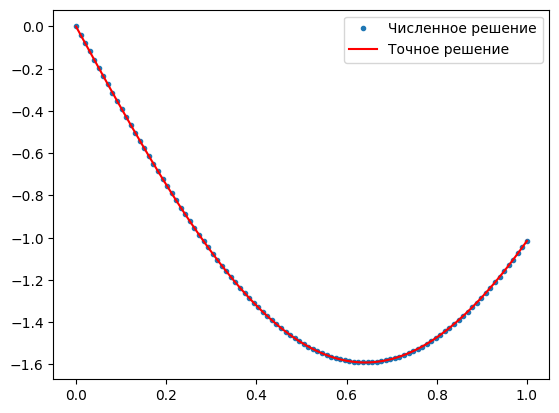

In [7]:
plot(n=20)
plot(n=100)